https://lazyprogrammer.me/tutorial-principal-components-analysis-pca/

In [65]:
#Data is a bunch of book titles one on each line
from __future__ import print_function, division
from builtins import range
import nltk
import numpy as np
import matplotlib.pyplot as plt

from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import TruncatedSVD


In [66]:
wordnet_lemmatizer = WordNetLemmatizer()

#Load all the book titles in an array
titles = [line.rstrip() for line in open('all_book_titles.txt')]

#Remove Stopwords
stopwords = set(w.rstrip() for w in open('stopwords.txt'))
#Add more stopwords
stopwords = stopwords.union({
    'introduction', 'edition', 'series', 'application',
    'approach', 'card', 'access', 'package', 'plus', 'etext',
    'brief', 'vol', 'fundamental', 'guide', 'essential', 'printed',
    'third', 'second', 'fourth',    
})


In [67]:
#Take tokenizer from the previous example Sentiment Analyzer
def my_tokenizer(s):
    #Downcasing words
    s = s.lower()
    tokens = nltk.tokenize.word_tokenize(s)
    #list apprehensions to keep only words >2
    tokens = [t for t in tokens if len(t) > 2]
    #using lemmatizer
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens]
    #remove stopwords
    tokens = [t for t in tokens if t not in stopwords]
    
    #Remove any Token that contains any digits, i.e. "3rd edition"
    tokens = [t for t in tokens if not any(c.isdigit() for c in t)] 
    return tokens
    

In [68]:
#To figure out the index of each word by going through the entire Vocabulary
word_index_map = {}
current_index = 0
all_tokens = []
all_titles = []
#Need a map back from index to word
index_word_map = []

for title in titles:
    #Try to encode invalid codes in ASCII
    try:
        title = title.encode('ascii','ignore').decode('utf-8')
        all_titles.append(title)
        #We are calling the my_tokenizer function
        tokens = my_tokenizer(title)
        all_tokens.append(tokens)
        for token in tokens:
            if token not in word_index_map:
                word_index_map[token] = current_index
                current_index += 1
                index_word_map.append(token)
    except:
        pass
    
    
          

In [69]:
#Copy tokens_to_vector() from Sentiment Analyzer
#But here there is no label and hence it's an unsupervised learning
def tokens_to_vector(tokens):
    x = np.zeros(len(word_index_map))
    for t in tokens:
        i = word_index_map[t]
        #We are going to use in the care functions i.e. binary 1 or 0
        x[i] = 1    
    return x

N = len(all_tokens)
D = len(word_index_map)
#Initialize our data array i.e. D X N
X = np.zeros((D, N))
i = 0
for tokens in all_tokens:
    X[:,i] = tokens_to_vector(tokens)
    i += 1
      
    

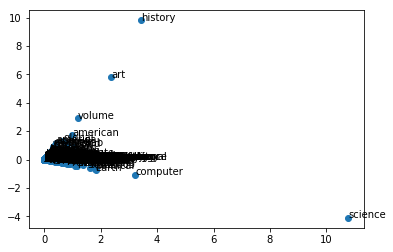

In [71]:
# Initialize the SVD object
svd = TruncatedSVD()
#Do fit and transform in the same step
Z = svd.fit_transform(X)
#Plot data on 2D plane
plt.scatter(Z[:,0], Z[:,1])
for i in range(D):
    #At each point spell out the word
    plt.annotate(s = index_word_map[i], xy = [Z[i,0], Z[i,1]])
plt.show()





In [ ]:
#LSA reduced the dimensionality to two